In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import requests
from datetime import datetime

warnings.filterwarnings('ignore')

In [49]:
url ='https://covid19.ddc.moph.go.th/api/Cases/timeline-cases-by-provinces'
data_covid = requests.get(url)
df = pd.DataFrame(data_covid.json())
df_sk = df[df['province']=='สงขลา']
df_sk['txn_date'] =pd.to_datetime(df['txn_date'])
df_sk.set_index('txn_date',inplace=True)

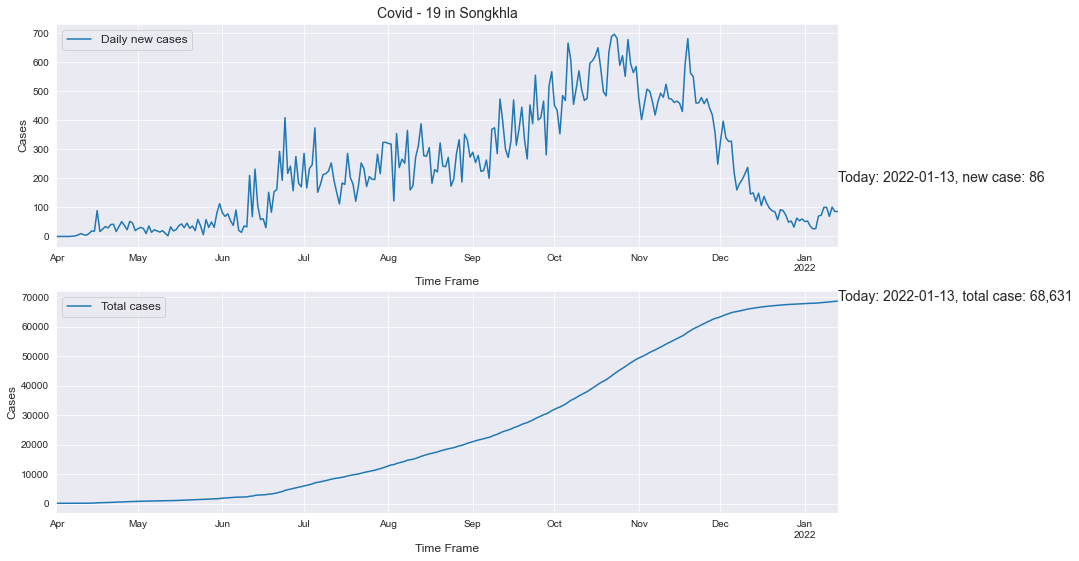

In [50]:
# Plot graph
sns.set_style('dark')
fig = plt.figure(figsize=(14,9))
ax1 = fig.add_subplot(211)
ax1 = df_sk['new_case'].plot(label='Daily new cases')
ax1.set_title('Covid - 19 in Songkhla',fontsize=14)
ax1.set_xlabel('Time Frame',fontsize=12)
ax1.set_ylabel('Cases',fontsize=12)
ax1.grid(True)
ax1.legend(loc='upper left',fontsize=12)
ax1.text(pd.to_datetime(str(df_sk.index[-1])),df_sk['new_case'][-1]+100,
         'Today: {}, new case: {:,}'.format(datetime.now().date(),df_sk['new_case'][-1]),
         fontsize=14)
ax2 = fig.add_subplot(212)
ax2 = df_sk['total_case'].plot(label='Total cases')
ax2.set_xlabel('Time Frame',fontsize=12)
ax2.set_ylabel('Cases',fontsize=12)
ax2.grid(True)
ax2.legend(fontsize=12)
ax2.text(pd.to_datetime(str(df_sk.index[-1])),df_sk['total_case'][-1]+100,
         'Today: {}, total case: {:,}'.format(datetime.now().date(),df_sk['total_case'][-1]),
         fontsize=14)

plt.show()